# TP1 - Parte 1 - Algoritmo White Patch

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

**Algoritmo White Patch:**

Es una técnica de corrección de color para lograr un balance de blancos automático. Se ajustan los colores de la imagen de manera de que no dependan del color de la fuente de iluminación utilizada en cada imagen. Para esto:

- Se convierte la imagen de uint8 a float32 para evitar errores de saturación
- Se trabaja por separado con cada canal RGB
- Se calcula el máximo de cada canal RGB y se asume que ese valor debería corresponder al blanco (255)
- Se escala cada canal para que el máximo coincida con 255, aplicando las fórmulas: 
    - R' = R * (255 / R_max)
    - G' = G * (255 / G_max)
    - B' = B * (255 / B_max)

In [2]:
def white_patch(image):
    """
    Parameters
    ----------
    image:np.ndarray 
        Imagen en formato BGR a corregir.
    
    Return
    ------
    result: numpy.ndarray
        Imagen corregida en formato BGR.
    """
    # Convertir a float32 para evitar errores de saturación
    image = image.astype(np.float32)

    # Separar canales
    b, g, r = cv.split(image)

    # Obtener máximos
    r_max = np.max(r)
    g_max = np.max(g)
    b_max = np.max(b)
    print("Máximos de la imagen:",r_max,g_max,b_max)

    # Evitar división por cero
    r_max = r_max if r_max > 0 else 1
    g_max = g_max if g_max > 0 else 1
    b_max = b_max if b_max > 0 else 1

    # Normalizar cada canal
    r = r * (255.0 / r_max)
    g = g * (255.0 / g_max)
    b = b * (255.0 / b_max)

    # Reunir canales
    result = cv.merge((b, g, r))
    result = np.clip(result, 0, 255).astype(np.uint8)
    return result

**Imágenes de manos con iluminación azul, verde y roja**

In [3]:
# Cargar imágenes de test
img_b = cv.imread('images/white_patch/test_blue.png')
img_g = cv.imread('images/white_patch/test_green.png')
img_r = cv.imread('images/white_patch/test_red.png')

# Dimensión de las imágenes
print(f'Tamaño imagen Blue: {img_b.shape} pix')
print(f'Tamaño imagen Green: {img_g.shape} pix')
print(f'Tamaño imagen Red: {img_r.shape} pix')

Tamaño imagen Blue: (100, 278, 3) pix
Tamaño imagen Green: (100, 278, 3) pix
Tamaño imagen Red: (99, 276, 3) pix


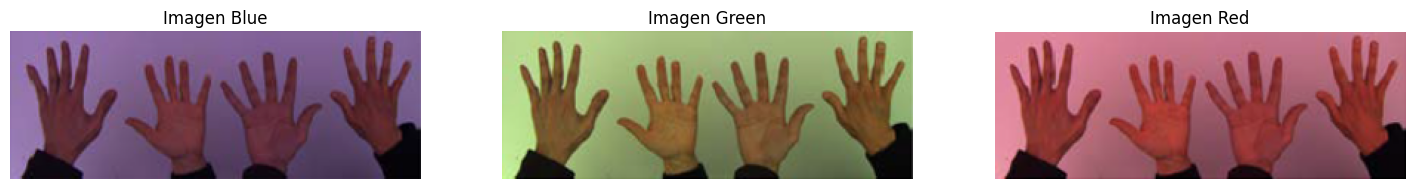

In [4]:
# Visualizar imágenes

plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img_b, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Blue')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(img_g, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Green')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(img_r, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Red')

plt.show()

In [5]:
# Corregir imágenes

img_b_corrected = white_patch(img_b)
img_g_corrected = white_patch(img_g)
img_r_corrected = white_patch(img_r)

Máximos de la imagen: 165.0 138.0 200.0
Máximos de la imagen: 210.0 250.0 171.0
Máximos de la imagen: 247.0 157.0 175.0


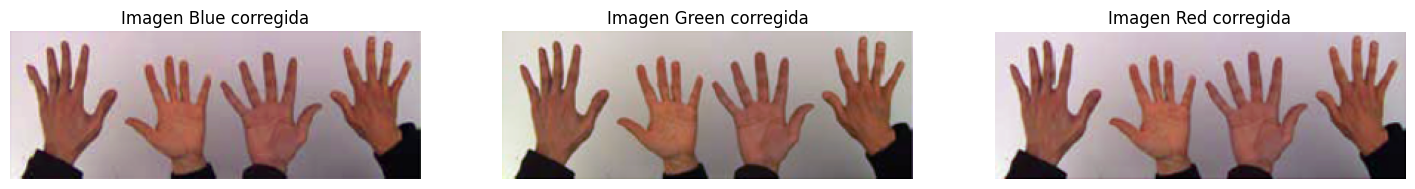

In [6]:
# Visualizar imágenes corregidas

plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img_b_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Blue corregida')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(img_g_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Green corregida')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(img_r_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Red corregida')

plt.show()

Se observa que las 3 imágenes (con ilumnación azul, verde y roja) fueron corregidas correctamente por el algoritmo White Patch. Las imágenes son muy similares entre sí, observándose el color correcto para la piel de las manos, con leves diferencias en el fondo.

**Imágenes de WP con iluminación azul, verde y roja**

Se cuenta con 5 imágenes de las siguientes características:
- Blue: 1 imagen .jpg
- Green: 2 imágenes, 1.png y 1 .jpg
- Red: 2 imágenes, 1.png y 1 .jpg

In [7]:
# Cargar imágenes de wp
img_wp_b = cv.imread('images/white_patch/wp_blue.jpg')
img_wp_g = cv.imread('images/white_patch/wp_green.png')
img_wp_g_2 = cv.imread('images/white_patch/wp_green2.jpg')
img_wp_r = cv.imread('images/white_patch/wp_red.png')
img_wp_r_2 = cv.imread('images/white_patch/wp_red2.jpg')

# Dimensión de las imágenes
print(f'Tamaño imagen Blue: {img_wp_b.shape} pix')
print(f'Tamaño imagen Green 1: {img_wp_g.shape} pix')
print(f'Tamaño imagen Green 2: {img_wp_g_2.shape} pix')
print(f'Tamaño imagen Red 1: {img_wp_r.shape} pix')
print(f'Tamaño imagen Red 2: {img_wp_r_2.shape} pix')

Tamaño imagen Blue: (1600, 1200, 3) pix
Tamaño imagen Green 1: (571, 363, 3) pix
Tamaño imagen Green 2: (1600, 1200, 3) pix
Tamaño imagen Red 1: (813, 481, 3) pix
Tamaño imagen Red 2: (1600, 1200, 3) pix


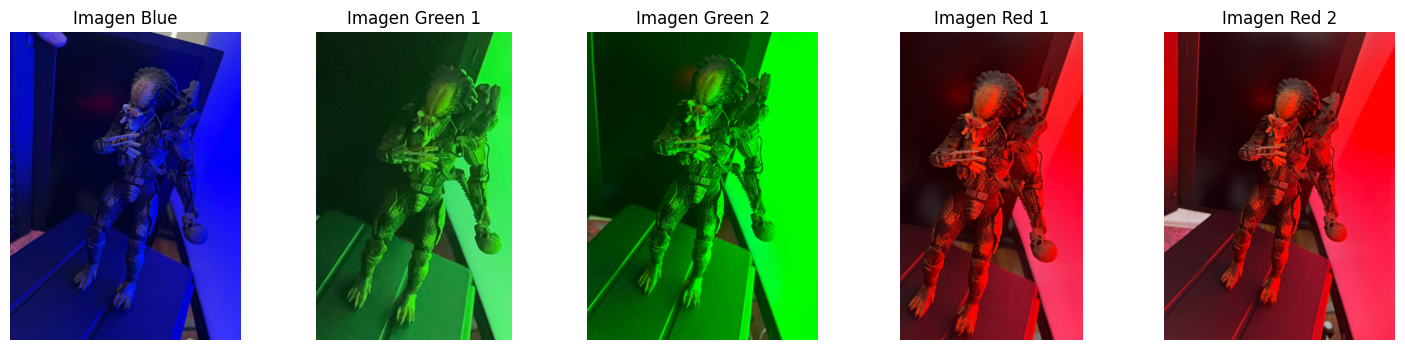

In [8]:
# Visualizar imágenes

plt.figure(figsize=(18, 4))

plt.subplot(1, 5, 1)
plt.imshow(cv.cvtColor(img_wp_b, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Blue')

plt.subplot(1, 5, 2)
plt.imshow(cv.cvtColor(img_wp_g, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Green 1')

plt.subplot(1, 5, 3)
plt.imshow(cv.cvtColor(img_wp_g_2, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Green 2')

plt.subplot(1, 5, 4)
plt.imshow(cv.cvtColor(img_wp_r, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Red 1')

plt.subplot(1, 5, 5)
plt.imshow(cv.cvtColor(img_wp_r_2, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Red 2')

plt.show()

In [9]:
# Corregir imágenes

img_wp_b_corrected = white_patch(img_wp_b)
img_wp_g_corrected = white_patch(img_wp_g)
img_wp_g2_corrected = white_patch(img_wp_g_2)
img_wp_r_corrected = white_patch(img_wp_r)
img_wp_r2_corrected = white_patch(img_wp_r_2)

Máximos de la imagen: 255.0 255.0 255.0
Máximos de la imagen: 126.0 252.0 155.0
Máximos de la imagen: 170.0 255.0 172.0
Máximos de la imagen: 255.0 134.0 122.0
Máximos de la imagen: 255.0 201.0 203.0


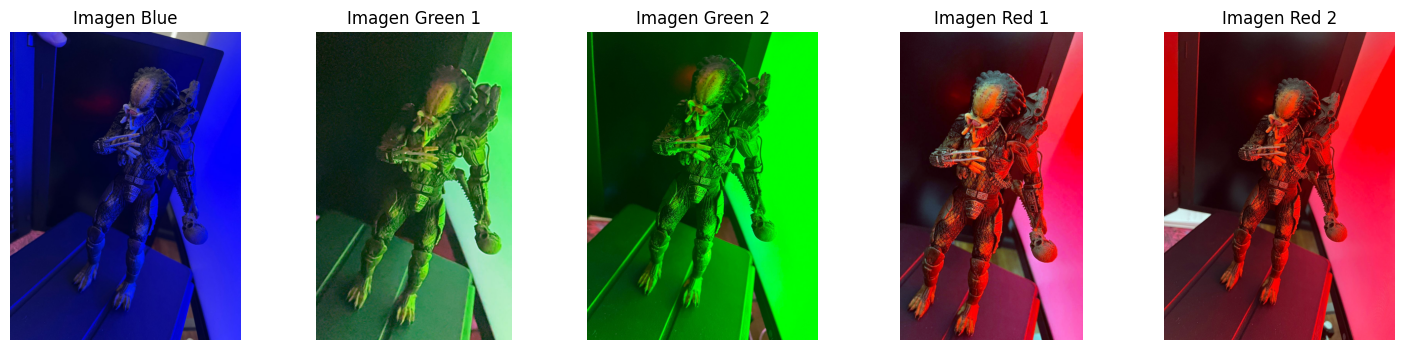

In [10]:
# Visualizar imágenes

plt.figure(figsize=(18, 4))

plt.subplot(1, 5, 1)
plt.imshow(cv.cvtColor(img_wp_b_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Blue')

plt.subplot(1, 5, 2)
plt.imshow(cv.cvtColor(img_wp_g_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Green 1')

plt.subplot(1, 5, 3)
plt.imshow(cv.cvtColor(img_wp_g2_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Green 2')

plt.subplot(1, 5, 4)
plt.imshow(cv.cvtColor(img_wp_r_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Red 1')

plt.subplot(1, 5, 5)
plt.imshow(cv.cvtColor(img_wp_r2_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Red 2')

plt.show()

**Análisis de los resultados:**

En estas imágenes, se observa que la corrección aplicada es muy leve (Green 1 y Red 1) y prácticamente nula en el resto de las imágenes. Para analizar este comportamiento, se modificó el algoritmo inicial para que imprima los valores máximos de los canales en cada imagen. Teniendo en cuenta que el factor de corrección aplicado a canal es 255/Val_Max, observamos que si el máximo del canal es 255 (o cercano a 255), el factor de corrección será 1, por lo que no se estará aplicando ninguna corrección. 

En el primer set de imágenes, sólo 1 de los canales tenía un valor cercano a 255, mientras que los otros dos canales estaban alrededor de la mitad de 255. De esta manera, en dos de los canales se estaba aplicando una corrección con un factor cercano a 2.

En el segundo set de imágenes, se observan máximos para cada canal mucho más altos. En el caso de la imagen Blue, todos los máximos son 255, por lo que no se está aplicando ninguna corrección. En Green 1 y Red 1, si bien uno de los canales es 255, los otros dos son cercanos a la mitad de 255, por lo que se observa un leve cambio. En Green 2 y Red 2, sólo uno de los canales es 255, pero los otros dos también presentan valores altos, por lo que la corrección aplicada es más difícil de percibir.

**Posibles acciones:**

Dado que el problema está asociado a que en los 3 canales hay valores muy cercanos a 255 (blanco puro), se podrían tomar distintas acciones para intentar solucionarlo:

- Recortar la imagen evitando incluir zonas blancas: esto es lo que se hizo entre las imágenes Green 1 y 2 y Red 1 y 2, y se observa que el recorte mejora el resultado obtenido, aunque no es suficiente.
- Percentil: en lugar de corregir utilizando el valor máximo del canal, utilizar un percentil (por ej. 99) para evitar valores atípicos.
- Condiciones mínimas: modificar el algoritmo white patch de manera que analice previamente la imagen e indique si será posible aplicar la corrección, o devuelva el % de corrección que se está aplicando. 

**Modificación usando percentil 99**

In [11]:
def white_patch_percentil(image):
    """
    Parameters
    ----------
    image:np.ndarray 
        Imagen en formato BGR a corregir.
    
    Return
    ------
    result: numpy.ndarray
        Imagen corregida en formato BGR.
    """
    # Convertir a float32 para evitar errores de saturación
    image = image.astype(np.float32)

    # Separar canales
    b, g, r = cv.split(image)

    # Obtener máximos
    r_max = np.percentile(r, 99)
    g_max = np.percentile(g, 99)
    b_max = np.percentile(b, 99)
    print("Percentil 99 de la imagen:",r_max,g_max,b_max)

    # Evitar división por cero
    r_max = r_max if r_max > 0 else 1
    g_max = g_max if g_max > 0 else 1
    b_max = b_max if b_max > 0 else 1

    # Normalizar cada canal
    r = r * (255.0 / r_max)
    g = g * (255.0 / g_max)
    b = b * (255.0 / b_max)

    # Reunir canales
    result = cv.merge((b, g, r))
    result = np.clip(result, 0, 255).astype(np.uint8)
    return result

In [12]:
# Corregir imágenes

img_wp_b_corrected = white_patch_percentil(img_wp_b)
img_wp_g_corrected = white_patch_percentil(img_wp_g)
img_wp_g2_corrected = white_patch_percentil(img_wp_g_2)
img_wp_r_corrected = white_patch_percentil(img_wp_r)
img_wp_r2_corrected = white_patch_percentil(img_wp_r_2)

Percentil 99 de la imagen: 117.0 86.0 254.0
Percentil 99 de la imagen: 88.0 244.0 120.0
Percentil 99 de la imagen: 70.0 255.0 56.0
Percentil 99 de la imagen: 255.0 74.0 102.0
Percentil 99 de la imagen: 255.0 119.0 119.0


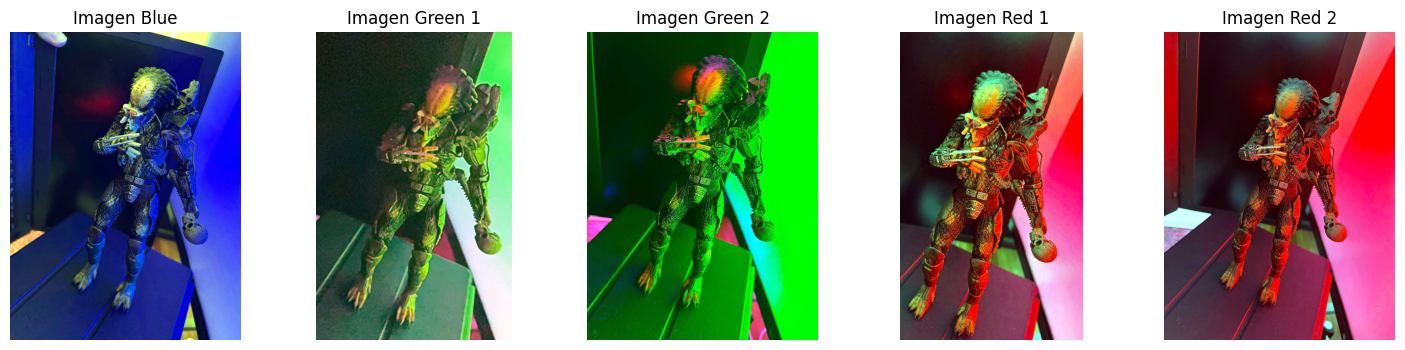

In [13]:
# Visualizar imágenes

plt.figure(figsize=(18, 4))

plt.subplot(1, 5, 1)
plt.imshow(cv.cvtColor(img_wp_b_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Blue')

plt.subplot(1, 5, 2)
plt.imshow(cv.cvtColor(img_wp_g_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Green 1')

plt.subplot(1, 5, 3)
plt.imshow(cv.cvtColor(img_wp_g2_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Green 2')

plt.subplot(1, 5, 4)
plt.imshow(cv.cvtColor(img_wp_r_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Red 1')

plt.subplot(1, 5, 5)
plt.imshow(cv.cvtColor(img_wp_r2_corrected, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen Red 2')

plt.show()

**Análisis de resultados:**

Se observa una mejora notoria en los resultados utilizando el algoritmo modificado con el percentil 99 en lugar del valor máximo del canal. Observando los valores utilizados en la corrección, se ve que si bien uno de los canales siempre es cercano a 255, los otros dos presentan valores mucho menores a los anteriores, cercanos a la mitad (o incluso menos) de 255.

Esto se ve reflejado en el resultado obtenido de las imágenes, especialmente en Blue, Green 1 y Red 1, que presentaban menores zonas blancas en la imagen original.